# ADA PROJECT 2 - Dive into the Heart of Chicaco's crime

## Dataset: Chicago Crime

### Abstract: 
This dataset records many crimes committed in the past 20 years in Chicago. We have access to the year, time, location, type of crime, district of each crime. We can thus make a geographical analysis to find concerned areas. We can also see the evolution of violence using the timestamp.

### Note:

This dataset was made publicy available by the city of Chicago and is updated every day. It can be found [here](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

In [101]:
import numpy as np
import pandas as pd
import math

## 0. Data Loading

_Data path_

In [241]:
DATA_FOLDER = './data/'
CHICAGO_CRIME_DATASET_PATH = DATA_FOLDER + 'chicago_crime.csv'

_Loading dataset_

In [242]:
chicago_crime = pd.read_csv(CHICAGO_CRIME_DATASET_PATH)

/Users/mjouve/opt/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


_Let's have a first look at the data._

In [243]:
chicago_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


## 1. Data Overview

_Here are all the attributes,_

In [244]:
print(list(chicago_crime.columns))

['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']


_and their corresponding data type._

In [245]:
print(chicago_crime.dtypes)

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object


_We can see that we could cast some attribute to other data types to ensure better storage and make our manipulations easier. For example some 'Object' attribute could be cast to 'string', the 'Date' attribute can be cast to a 'Date' type..._

_Here is the official description of each attribute:_
- **ID:** _Unique identifier for the record._
- **Case Number:** _The Chicago Police Department RD Number (Records Division Number), which is unique to the incident._
- **Date:** _Date when the incident occurred. This is sometimes a best estimate._
- **Block:** _The partially redacted address where the incident occurred, placing it on the same block as the actual address._
- **IUCR:** _The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e._
- **Primary Type:** _The primary description of the IUCR code._
- **Description:** _The secondary description of the IUCR code, a subcategory of the primary description._
- **Location Description:** _Description of the location where the incident occurred._
- **Arrest:** _Indicates whether an arrest was made._
- **Domestic:** _Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act._
- **Beat:** _Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74._
- **District:** _Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r._
- **Ward:** _The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76._
- **Community Area:** _Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6._
- **FBI Code:** _UIndicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_type_
- **X Coordinate:** _The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block._
- **Y Coordinate:** _The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block._
- **Year:** _Year the incident occurred._
- **Updated On:** _Date and time the record was last updated._
- **Latitude:** _The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block._
- **Longitude:** _The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block._
- **Location:** _The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block._

_Let's see the total size._

In [246]:
rows, features = chicago_crime.shape
print('There are {r} entries, each having {f} features.'.format(r = rows, f = features))

There are 7011333 entries, each having 22 features.


_Let's have an overview of each attribute._

In [247]:
chicago_crime.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,7.011333e+06,7.011333e+06,7.011284e+06,6.396505e+06,6.397837e+06,6.944525e+06,6.944525e+06,7.011333e+06,6.944525e+06,6.944525e+06
mean,6.430191e+06,1.189883e+03,1.129731e+01,2.270279e+01,3.755591e+01,1.164537e+06,1.885734e+06,2.008715e+03,4.184205e+01,-8.767173e+01
std,3.158253e+06,7.032033e+02,6.945929e+00,1.383502e+01,2.153585e+01,1.715685e+04,3.268870e+04,5.304911e+00,8.995043e-02,6.209020e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.511443e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152945e+06,1.859184e+06,2.004000e+03,4.176889e+01,-8.771380e+01
50%,6.418535e+06,1.111000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.166026e+06,1.890643e+06,2.008000e+03,4.185572e+01,-8.766609e+01
75%,9.162359e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176352e+06,1.909272e+06,2.013000e+03,4.190677e+01,-8.762833e+01
max,1.189601e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.019000e+03,4.202291e+01,-8.752453e+01


_Are there any missing values in the dataset?_

In [248]:
# Check which columns contains missing values.
chicago_crime.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      5847
Arrest                       0
Domestic                     0
Beat                         0
District                    49
Ward                    614828
Community Area          613496
FBI Code                     0
X Coordinate             66808
Y Coordinate             66808
Year                         0
Updated On                   0
Latitude                 66808
Longitude                66808
Location                 66808
dtype: int64

## 2. Data Cleaning

_Let's see if the data contains duplicate, i.e rows with the same **ID**._

In [249]:
np.max(list(chicago_crime['ID'].value_counts()))

1

_The maximum count for all 'ID's is 1, thus we can conclude that the dataset doesn't have any duplicates._

_Let's now discuss which attributes we can get rid of. Indeed, some attributes might not be useful for our analysis:_
- _We do not care about identifying uniquely each entry as we do a broad analysis of crime in Chicago so we can remove **ID** and **Case Number**._
- _The **IUCR** attribute is a code description for the crime but we already have the corresponding textual description of the crime by looking at **Primary Type** and **Description** so we can remove it._
- _In order to locate the area of Chicago where a crime happened it would be better to keep an attribute that is general for the city of Chicago. Indeed **Beat**(s) and **District**(s) only refer to Police related areas whereas **Ward**(s) and **Community Area**(s) are relevant area notation not only for Police. We can thus only keep the **Community Area** field._
- _The **FBI Code** is not relevant because we have access to a textual description of the crime._
- _The **Updated On** field is not relevant for our study._
- _We can also remove the **X Coordinate** and **Y Coordinate** attributes because they are relative to the State Plane Illinois East NAD 1983 projection. We can remove the **Block** attribute as it also describes the location. We also have the **Latitude** and **Longitude** attributes which will be easier to manipulate to create spatial visualizations. Moreoever because those two fields are gathered in the **Location** attribute, we can also remove it._

In [250]:
selected_features = ['Date',
                     'Primary Type',
                     'Description',
                     'Location Description',
                     'Arrest',
                     'Domestic',
                     'Community Area',
                     'Year',
                     'Latitude',
                     'Longitude']

In [251]:
# Selecting features of interest and copy them to a new DataFrame
chicago_crime_v2 = chicago_crime[selected_features].copy()

In [252]:
chicago_crime_v2.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude
0,01/01/2001 11:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,45.0,2001,NaN,NaN
1,10/08/2017 03:00:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,73.0,2017,NaN,NaN
2,03/28/2017 02:00:00 PM,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,70.0,2017,NaN,NaN
3,09/09/2017 08:17:00 PM,THEFT,OVER $500,RESIDENCE,False,False,42.0,2017,NaN,NaN
4,08/26/2017 10:00:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,32.0,2017,NaN,NaN


_Now let's see what can be done to remove or replace missing values._
- _First the **Latitude** and **Longitude** fields are critical for our analysis as we need it to localize a crime and analyse which areas are more concerned by violence than others._

In [253]:
chicago_crime_v2[['Latitude']].isnull().sum()

Latitude    66808
dtype: int64

In [254]:
chicago_crime_v2[['Longitude']].isnull().sum()

Longitude    66808
dtype: int64

_We should then remove all the rows with missing location

In [255]:
chicago_crime_v2 = chicago_crime_v2[pd.notnull(chicago_crime_v2['Longitude'])]

_We should now look at other missing values once those are removed._

In [256]:
chicago_crime_v2.isnull().sum()

Date                         0
Primary Type                 0
Description                  0
Location Description      3862
Arrest                       0
Domestic                     0
Community Area          604291
Year                         0
Latitude                     0
Longitude                    0
dtype: int64

_Let's have a look at what is inside the **Location Description** field._

In [257]:
list(chicago_crime_v2['Location Description'].unique())

['AIRCRAFT',
 'STREET',
 'RESIDENTIAL YARD (FRONT/BACK)',
 'RESIDENCE',
 'APARTMENT',
 'CTA BUS',
 'PARKING LOT/GARAGE(NON.RESID.)',
 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP',
 'OTHER',
 'RESIDENCE-GARAGE',
 'CTA TRAIN',
 'SCHOOL, PRIVATE, BUILDING',
 'HOTEL/MOTEL',
 'LIBRARY',
 'CTA STATION',
 'SCHOOL, PUBLIC, BUILDING',
 'RESTAURANT',
 'ALLEY',
 'VEHICLE NON-COMMERCIAL',
 'COMMERCIAL / BUSINESS OFFICE',
 'CTA PLATFORM',
 'SIDEWALK',
 'GAS STATION',
 'RESIDENCE PORCH/HALLWAY',
 'SCHOOL, PUBLIC, GROUNDS',
 'POLICE FACILITY/VEH PARKING LOT',
 'GROCERY FOOD STORE',
 'LAKEFRONT/WATERFRONT/RIVERBANK',
 'TAVERN/LIQUOR STORE',
 'ABANDONED BUILDING',
 'PARKING LOT',
 'CTA BUS STOP',
 'GOVERNMENT BUILDING/PROPERTY',
 'BAR OR TAVERN',
 'VACANT LOT/LAND',
 'SMALL RETAIL STORE',
 'PARK PROPERTY',
 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA',
 'DEPARTMENT STORE',
 'VEHICLE-COMMERCIAL',
 'HOSPITAL BUILDING/GROUNDS',
 'MEDICAL/DENTAL OFFICE',
 'CURRENCY EXCHANGE',
 'OTHER RAILROAD PROP / TRAIN DEPOT',
 

_The list is already exhaustive. It wouldn't make sense to convert the missing values to 'OTHER' since 'OTHER' might correspond to very specific cases. Thus we will keep the missing values for now and see how to deal with them once we need to analyse them._

_Regarding the **Community Area** field we will keep missing values for now as the rows have **Location**(s) but we will remove those rows if we gather data according to community areas to see the evolution per area._

_We will now deal with data types._

In [258]:
chicago_crime_v2.dtypes

Date                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Community Area          float64
Year                      int64
Latitude                float64
Longitude               float64
dtype: object

- _**Date** has to be transformed to a python 'Dates' type._
- _**Primary Type**, **Description**, **Location Description** have to be transformed to a 'str' type._
- _**Community Area** has to be transformed to a 'int' type._

In [259]:
import datetime

In [260]:
chicago_crime_v2['Date'].head()

60345    01/03/2019 07:20:00 PM
62272    03/16/2019 05:58:00 PM
62615    03/12/2019 10:00:00 PM
62648    03/14/2019 06:42:00 PM
62649    03/14/2019 04:03:00 PM
Name: Date, dtype: object

_In the dataset the format is as follow $month$/$day$/$year$ $hour$ $morning$/$evening$._

_The python datetime.datetime is as follow:_

_class datetime.datetime(year, month, day, hour=0, minute=0, second=0, microsecond=0, tzinfo=None, *, fold=0)_

_Let's now change the **Date** field type to a datetime.datetime type._

In [261]:
def to_datetime(s):    
    # getting the date, time and moment (AM or PM)
    date, time, moment = s.split(' ')
    
    # getting month, day and year from the date
    month, day, year = date.split('/')
    
    # getting the hour and minute from time
    hour, minute, _ = time.split(':')
    
    # casting to int
    year = int(year)
    month = int(month)
    day = int(day)
    
    hour = int(hour)
    minute = int(minute)
    
    # we round to the next hour if minute > 30
    if minute > 30:
        hour += 1
    
    if hour >= 12:
        hour -= 12
    
    # we create hour between 0 and 24 
    if moment == 'PM':
        hour += 12
    
    return datetime.datetime(year, month, day, hour)

In [262]:
chicago_crime_v2['Date'] = chicago_crime_v2['Date'].apply(to_datetime)

_We can also split the Date to a 'month', 'day', and 'hour' features to then gather data according to a specific month, or time of day (night or during the day) and have better analysis._

In [263]:
# Creating new features
chicago_crime_v2['Hour'] = chicago_crime_v2['Date'].apply(lambda datetime : datetime.time().hour)
chicago_crime_v2['Day'] = chicago_crime_v2['Date'].apply(lambda datetime : datetime.date().day)
chicago_crime_v2['Month'] = chicago_crime_v2['Date'].apply(lambda datetime : datetime.date().month)

In [264]:
chicago_crime_v2.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude,Hour,Day,Month
60345,2019-01-03 19:00:00,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,76.0,2019,42.002816,-87.906094,19,3,1
62272,2019-03-16 18:00:00,BATTERY,SIMPLE,STREET,False,False,32.0,2019,41.883369,-87.633860,18,16,3
62615,2019-03-12 22:00:00,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,36.0,2019,41.825347,-87.606781,22,12,3
62648,2019-03-14 19:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1.0,2019,42.016542,-87.672499,19,14,3
62649,2019-03-14 16:00:00,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,36.0,2019,41.825299,-87.606961,16,14,3


_We convert the following features to 'str' type._

In [265]:
# Casting to 'str'
chicago_crime_v2['Primary Type'] = chicago_crime_v2['Primary Type'].apply(lambda o : str(o))
chicago_crime_v2['Description'] = chicago_crime_v2['Description'].apply(lambda o : str(o))
chicago_crime_v2['Location Description'] = chicago_crime_v2['Location Description'].apply(lambda o : str(o))

_We convert the **Community Area** field from 'float' to 'int'._

In [266]:
#64 The only way to have 'int' type and 'nan' in the same column is to use the 'Int64' type
chicago_crime_v2 = chicago_crime_v2.astype({'Community Area': 'Int64'})

_Moreover the **Latitude** and **Longitude** features might contains outliers. Indeed, some crimes comitted outside of Chicago might have ended up in the dataset._

_After looking on Google Maps, in order to keep crimes only committed in Chicaco we would need:_
- _41.0 $\leq$ **Latitude** $\leq$ 42.5_
- _-88.0 $\leq$ **Longitude** $\leq$ -87.0_

_Number of rows before removing location outliers:_

In [268]:
chicago_crime_v2.shape[0]

6944525

In [269]:
# Filtering the location
chicago_crime_v2 = chicago_crime_v2[(chicago_crime_v2['Latitude'] >= 41.00)
                                   & (chicago_crime_v2['Latitude'] <= 42.5)
                                   & (chicago_crime_v2['Longitude'] >= -88.00)
                                   & (chicago_crime_v2['Longitude'] <= -87.00)]

_Number of rows after removing location outliers:_

In [270]:
chicago_crime_v2.shape[0]

6944360

_It removed 165 entries._

_Finally we have:_

In [271]:
chicago_crime_v2.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude,Hour,Day,Month
60345,2019-01-03 19:00:00,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,76,2019,42.002816,-87.906094,19,3,1
62272,2019-03-16 18:00:00,BATTERY,SIMPLE,STREET,False,False,32,2019,41.883369,-87.633860,18,16,3
62615,2019-03-12 22:00:00,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,36,2019,41.825347,-87.606781,22,12,3
62648,2019-03-14 19:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1,2019,42.016542,-87.672499,19,14,3
62649,2019-03-14 16:00:00,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,36,2019,41.825299,-87.606961,16,14,3


_and the following types:_

In [272]:
chicago_crime_v2.dtypes

Date                    datetime64[ns]
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Community Area                   Int64
Year                             int64
Latitude                       float64
Longitude                      float64
Hour                             int64
Day                              int64
Month                            int64
dtype: object

In [273]:
import pickle

_We now save the clean dataset for further uses._

In [275]:
# If file exists then load it
try:
    chicago_crime = pickle.load(open("./data/chicago_crime.pickle", "rb"))
# Otherwise create it
except (OSError, IOError) as e:
    chicago_crime = chicago_crime_v2
    pickle.dump(chicago_crime, open("./data/chicago_crime.pickle", "wb"))

In [276]:
chicago_crime.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude,Hour,Day,Month
60345,2019-01-03 19:00:00,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,76,2019,42.002816,-87.906094,19,3,1
62272,2019-03-16 18:00:00,BATTERY,SIMPLE,STREET,False,False,32,2019,41.883369,-87.633860,18,16,3
62615,2019-03-12 22:00:00,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,36,2019,41.825347,-87.606781,22,12,3
62648,2019-03-14 19:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1,2019,42.016542,-87.672499,19,14,3
62649,2019-03-14 16:00:00,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,36,2019,41.825299,-87.606961,16,14,3


## 3. Data Exploration

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

_Let's have a look at how the features are correlated._

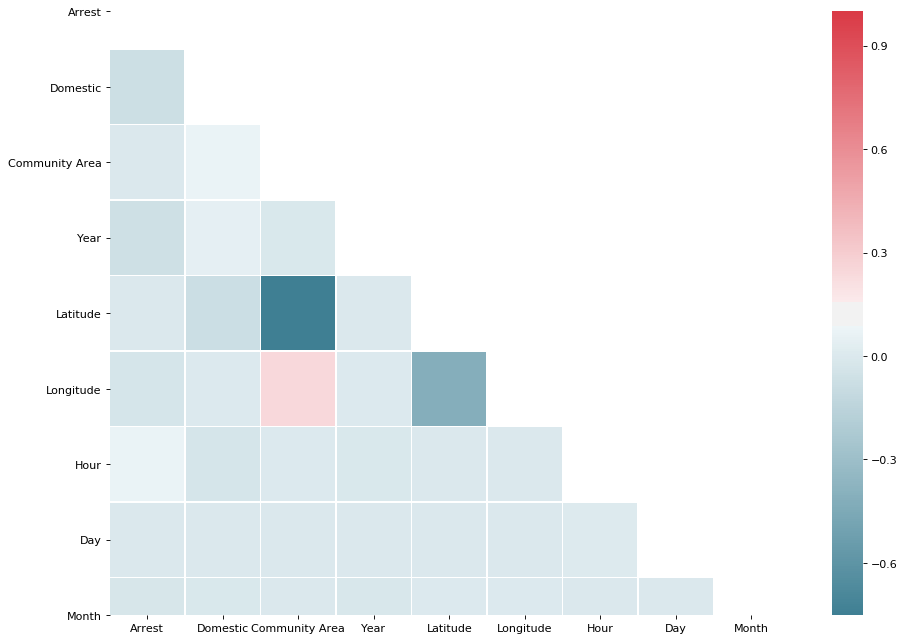

In [135]:
# Create the matrix and the figure.
f, ax = plt.subplots(figsize = (14, 10), dpi = 80)
corr = chicago_crime.corr()

# Create the mask to hide the duplicated cells.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Create the heatmap with the correlation matrix data
sns.heatmap(corr,
            mask = mask,
            cmap = sns.diverging_palette(220, 10, as_cmap = True),
            square = True,
            linewidths = 0.2,
            ax = ax)
plt.show()

_We can observe that the features are not very correlated which mean that we do not have unecessary features that could be guessed from other ones._

_We can first have a look at the different kind of crimes and their respective counts._

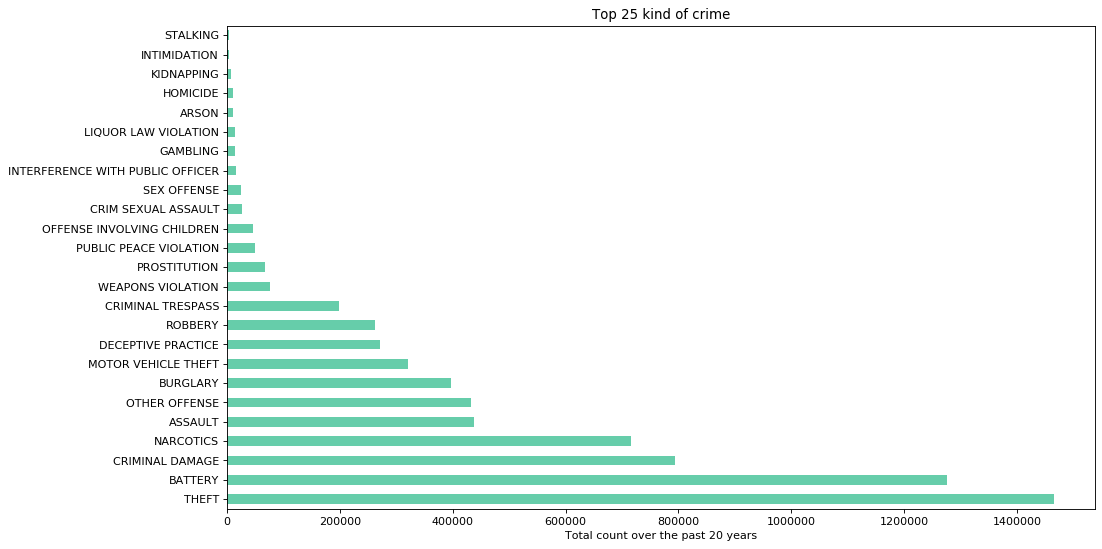

In [209]:
# Plot the 25 most common crimes type
plt.figure(figsize=(14, 8), dpi = 80)
chicago_crime['Primary Type'].value_counts().head(25).plot(kind='barh', color='mediumaquamarine')
plt.title('Top 25 kind of crime')
plt.xlabel('Total count over the past 20 years')
plt.show()

_From each of those categories we can dive deeper: for example here are the most common kind of 'THEFT'._

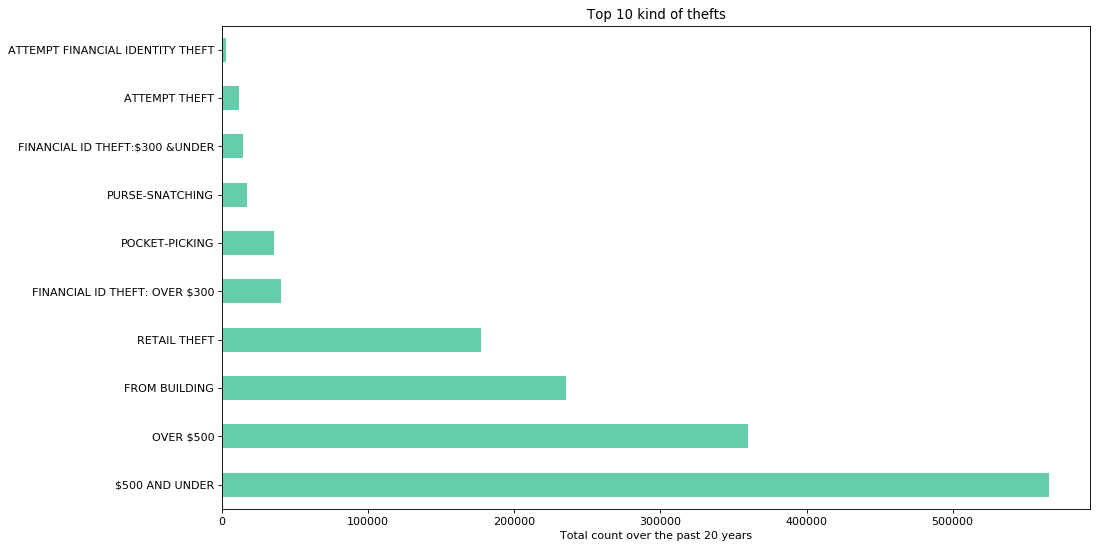

In [210]:
# Selecting all Thefts
thefts = chicago_crime[chicago_crime['Primary Type'] == 'THEFT']

# Plotting the top 10 kind of thefts
plt.figure(figsize=(14, 8), dpi = 80)
thefts['Description'].value_counts().head(10).plot(kind='barh', color='mediumaquamarine')
plt.title('Top 10 kind of thefts')
plt.xlabel('Total count over the past 20 years')
plt.show()

_One thing that can be done for further analysis would be to only consider a kind of crime, for example sexual assaults, or major crime. Indeed we could guess that small thefts happen everywhere and do not necessarily represent a violent city._

_Let's now have a look at the different crime location._

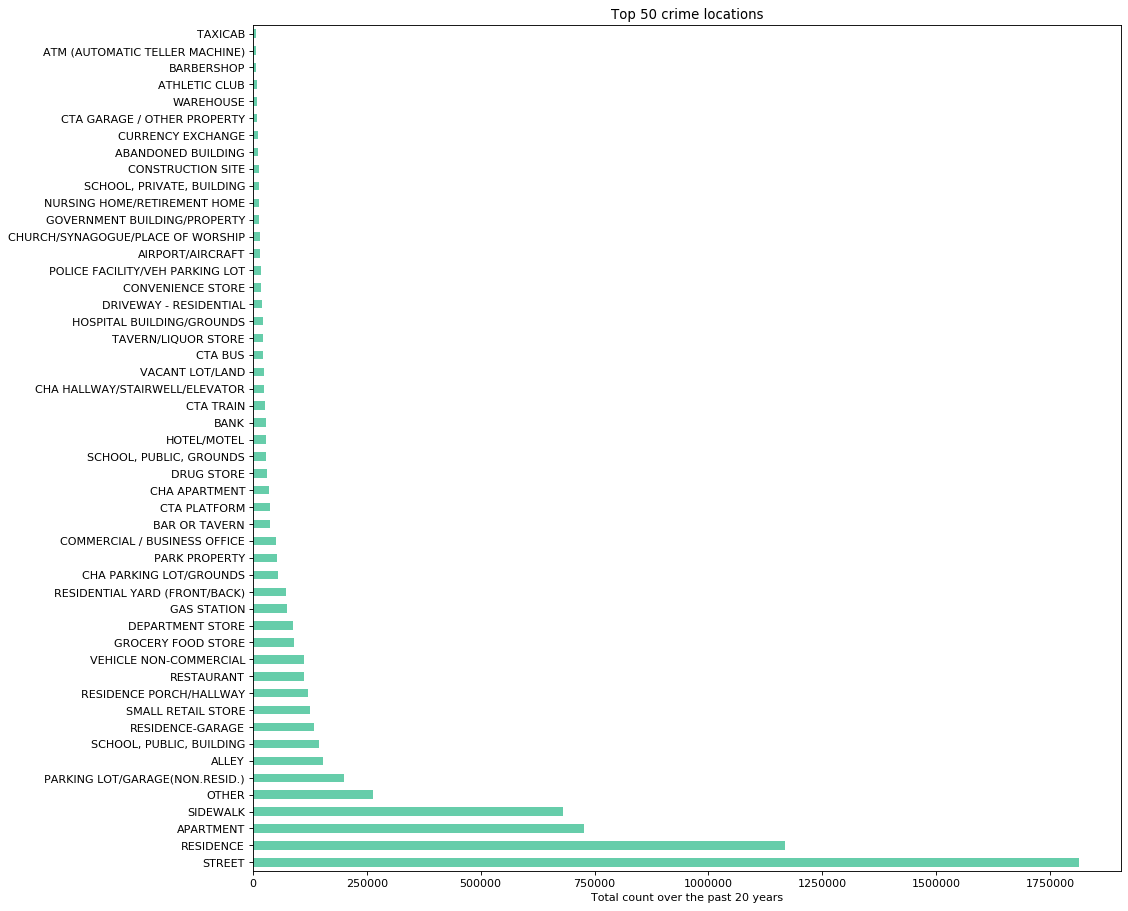

In [277]:
# Plot the 50 most appearning location type
plt.figure(figsize=(14, 14), dpi = 80)
chicago_crime['Location Description'].value_counts().head(50).plot(kind='barh', color='mediumaquamarine')
plt.title('Top 50 crime locations')
plt.xlabel('Total count over the past 20 years')
plt.show()

_We could also make bigger groups such as 'PUBLIC' or 'PRIVATE' for further analysis. Indeed some locations seem to be broad such as 'STREET' and other very specific. We could thus make our own categories._

_We can have a look at the distribution of domestic / non-domestic crime._

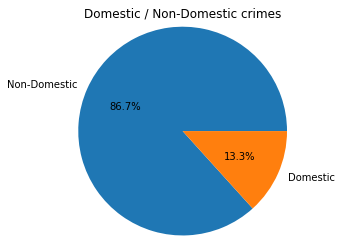

False    6021263
True      923262
Name: Domestic, dtype: int64


In [139]:
# Show the proportion of Domestic / Non-Domestic crimes:
domestic_count = chicago_crime['Domestic'].value_counts()
ax = domestic_count.plot(kind='pie', labels= ['Non-Domestic', 'Domestic'], autopct='%1.1f%%',  radius=1.2)
ax.set_ylabel('')
plt.title('Domestic / Non-Domestic crimes')
plt.show()

print(domestic_count)

_What could be interesting to do is to see the same plot for some specific kind of crime such as sexual assault, or sex offense, murder (we often say that murderers are usually relatives of the victim)._

_We can do the same plot with the 'Arrest' feature. Indeed, it could help us predict what are the chances of arresting someome given some other features such as kind of crime or location._

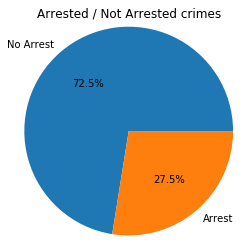

False    5032986
True     1911539
Name: Arrest, dtype: int64


In [140]:
# Show the proportion of Arrest / Not-Arrest crimes:
arrest_count = chicago_crime['Arrest'].value_counts()

ax = arrest_count.plot(kind='pie', labels= ['No Arrest', 'Arrest'], autopct='%1.1f%%',  radius=1.2)
ax.set_ylabel('')
plt.title('Arrested / Not Arrested crimes')
plt.show()

print(arrest_count)

_We could also visualize the evolution of that ratio with the years. We can guess that Police has better results nowadays due to advance in crime analysis._

_Let's now have a look at spatial / temporal features._

_We can first take all the non null **Community Area** and see what what areas are most concerned by violence. We can thus tell which areas to avoid and which one are safer._

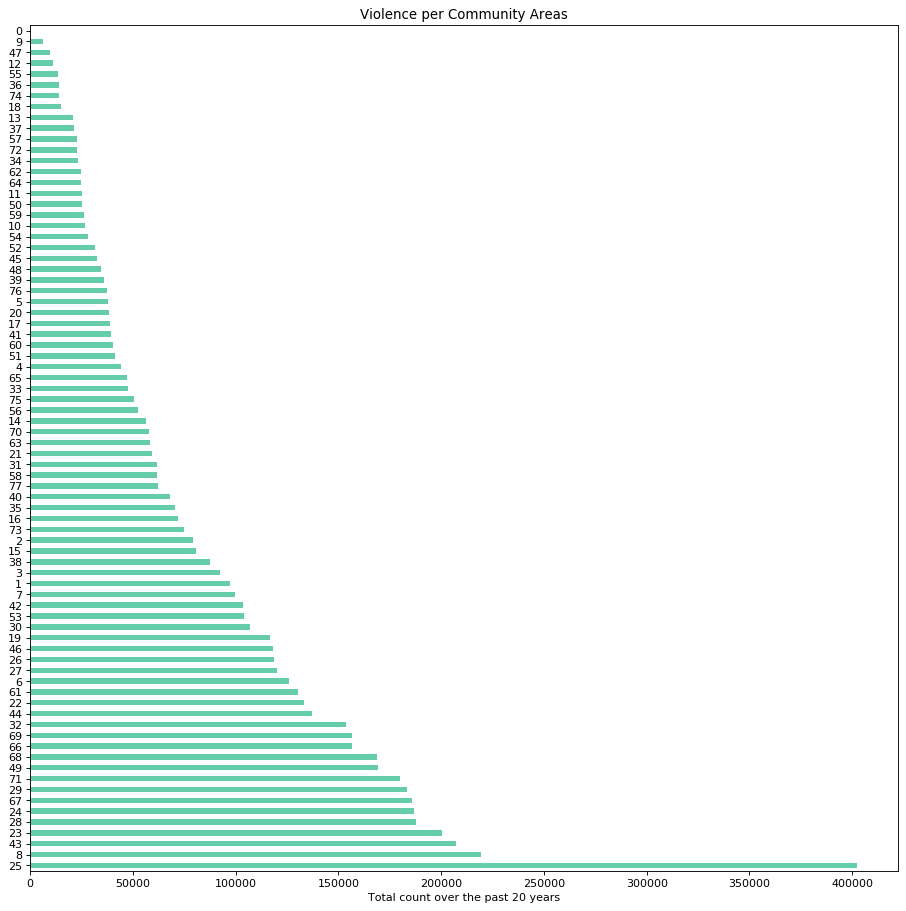

In [212]:
# Selecting 'Community Area' feature and remove missing values
community_areas_count = chicago_crime['Community Area'].dropna().value_counts()

plt.figure(figsize=(14, 14), dpi = 80)
community_areas_count.plot(kind='barh', color='mediumaquamarine')
plt.title('Violence per Community Areas')
plt.xlabel('Total count over the past 20 years')
plt.show()

_We can clearly see that the community area # 25 is the most violent one. Let's have a look at the Chicago map to see where it is:_

![Chicago Community Areas](https://upload.wikimedia.org/wikipedia/commons/9/94/Blank_Chicago_Community_Area_Map.png)

_One violent hub seems to gather areas 25, 23, 24, 8. Areas far away from the center seem to be less violent overall. It is the case for areas 9, 12, 55._

_Let's have a look at what are the most important kind of crime in area 25._

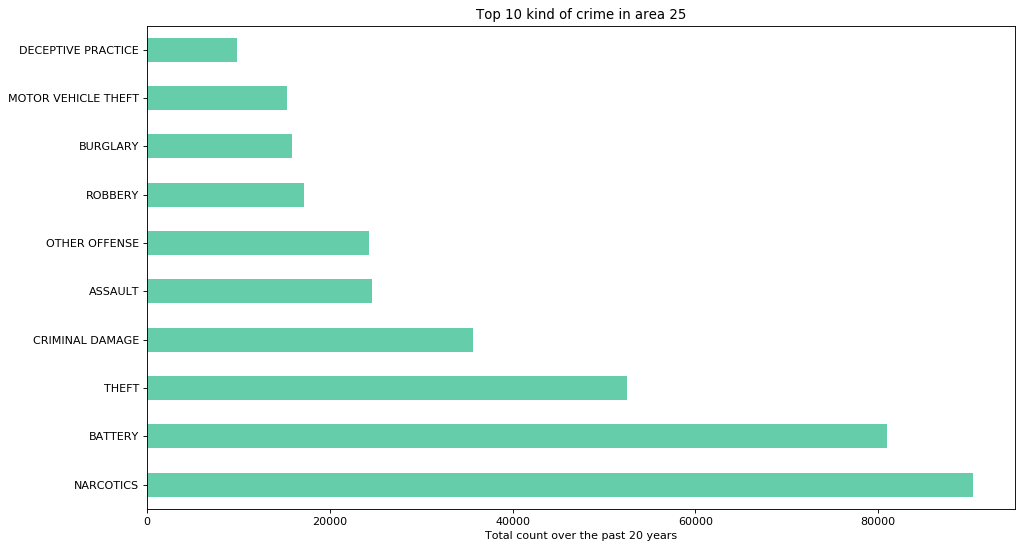

In [213]:
# Selecting crime committed in the Comnmunity Area # 25
chicago_crime_area_25 = chicago_crime[chicago_crime['Community Area'] == 25]

# Plot the 10 most common crime type in area 25
plt.figure(figsize=(14, 8), dpi = 80)
chicago_crime_area_25['Primary Type'].value_counts().head(10).plot(kind='barh', color='mediumaquamarine')
plt.title('Top 10 kind of crime in area 25')
plt.xlabel('Total count over the past 20 years')
plt.show()

_Compared to the same graph for the whole city, we can clearly see that area 25 is a zone with criminal activity. Indeed, the most common kind of crime is 'NARCOTIC' which is typical for districts with criminal activities._

_How active is the Police in this area? Let's see the ratio for arrests in that area._

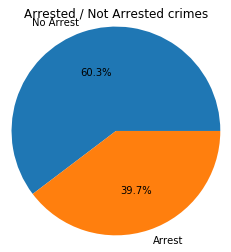

False    242548
True     159610
Name: Arrest, dtype: int64


In [157]:
# Selecting the 'Arrest' feature
arrest_count_area_25 = chicago_crime_area_25['Arrest'].value_counts()

ax = arrest_count_area_25.plot(kind='pie', labels= ['No Arrest', 'Arrest'], autopct='%1.1f%%',  radius=1.2)
ax.set_ylabel('')
plt.title('Arrested / Not Arrested crimes')
plt.show()

print(arrest_count_area_25)

_With a better Arrest rate we can guess that Police is already focusing its activity toward area 25._

_Here are the 'NARCOTICS' crimes for area 25 with the 'Arrest' feature used for coloring._

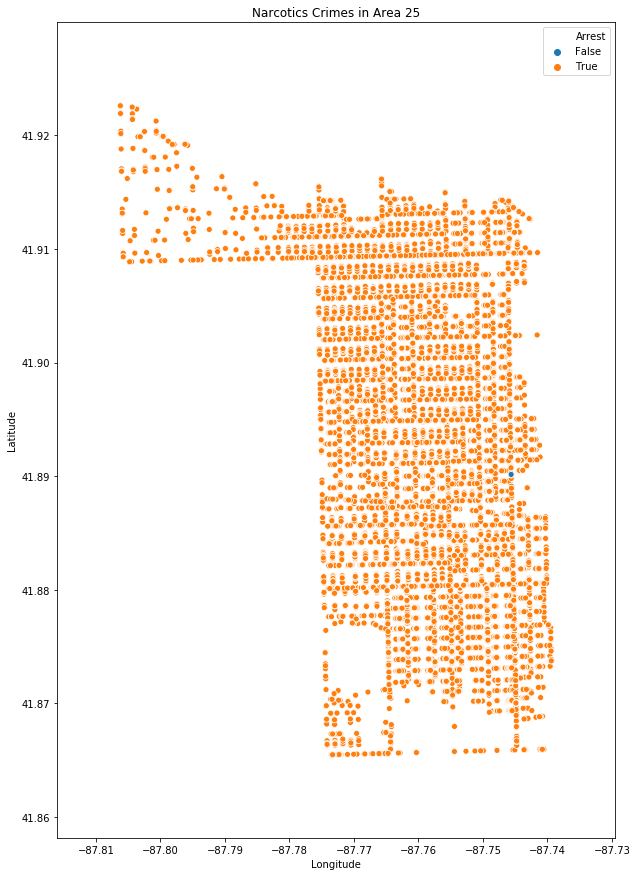

In [167]:
plt.figure(figsize=(10, 15))
sns.scatterplot(x='Longitude', y='Latitude', hue='Arrest', data = chicago_crime_area_25[chicago_crime_area_25['Primary Type'] == 'NARCOTICS'])
plt.title('Narcotics Crimes in Area 25')
plt.show()

_It seems like Police is very active for Narcotics related crimes as almost all of them result in an arrest._

_Let's now see how crime rate evolved with the years._

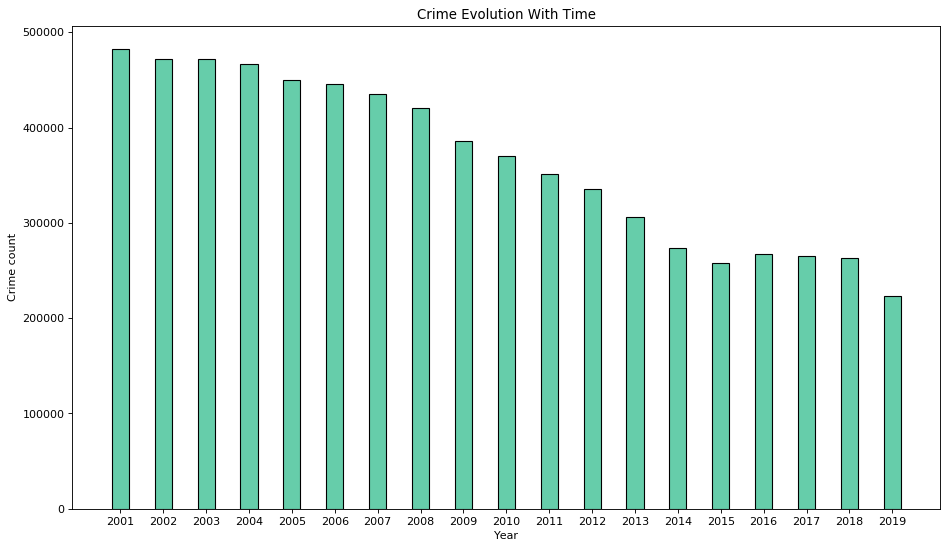

In [226]:
# Plot the crime rate evolution with the years
plt.figure(figsize=(14, 8), dpi = 80)
year_crime = chicago_crime['Year'].value_counts().sort_index()
plt.bar(year_crime.index, year_crime.values, width=0.4, color='mediumaquamarine', edgecolor='black')
plt.xticks(year_crime.index)
plt.title('Crime Evolution With Time')
plt.ylabel('Crime count')
plt.xlabel('Year')
plt.show()

_Is the Police getting better with time?_

In [221]:
# Selecting crimes that led to an arrest
year_crime_arrest = chicago_crime[chicago_crime['Arrest'] == True]['Year'].value_counts().sort_index()

In [222]:
# Selecting crimes for which the Police never arrested anyone
year_crime_no_arrest = chicago_crime[chicago_crime['Arrest'] == False]['Year'].value_counts().sort_index()

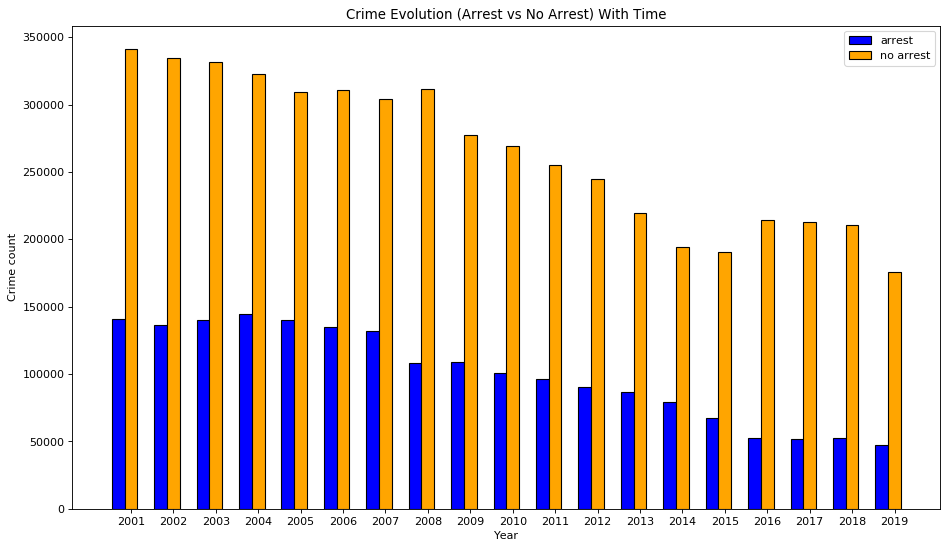

In [230]:
plt.figure(figsize=(14, 8), dpi = 80)
barWidth = 0.3

# Arrest
bars1 = year_crime_arrest.values

# No arrest
bars2 = year_crime_no_arrest.values
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create Arrest bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='arrest')
 
# Create No Arrest bars
plt.bar(r2, bars2, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='no arrest')
 
plt.xticks([r + barWidth for r in range(len(bars1))], year_crime_arrest.index)
plt.title('Crime Evolution (Arrest vs No Arrest) With Time')
plt.ylabel('Crime count')
plt.xlabel('Year')
plt.legend()
plt.show()


_The amount of arrests made since 2015 dropped. However violence increased in 2015. What could be the cause? Are criminals getting better?_

_What about months? Are crimials more active during summer (tourism) ?_

In [228]:
def toMonth(number):
    if number == 1:
        return 'January'
    elif number == 2:
        return 'February'
    elif number == 3:
        return 'March'
    elif number == 4:
        return 'April'
    elif number == 5:
        return 'May'
    elif number == 6:
        return 'June'
    elif number == 7:
        return 'July'
    elif number == 8:
        return 'August'
    elif number == 9:
        return 'September'
    elif number == 10:
        return 'October'
    elif number == 11:
        return 'November'
    elif number == 12:
        return 'December'

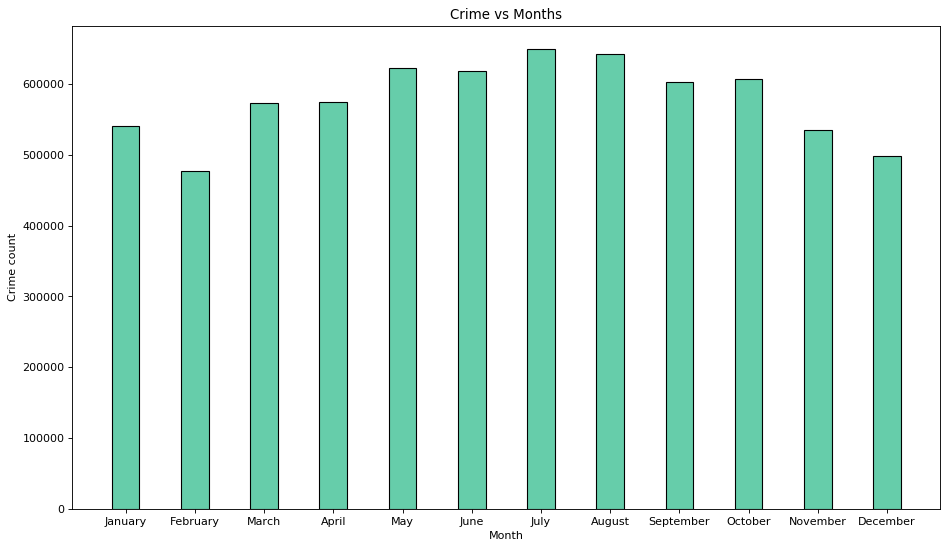

In [233]:
# Plot the crime vs month of the year
plt.figure(figsize=(14, 8), dpi = 80)
month_crime = chicago_crime['Month'].value_counts().sort_index()
plt.bar(month_crime.index, month_crime.values, width=0.4, color='mediumaquamarine', edgecolor='black')
plt.xticks(range(1, len(month_crime.index) + 1), [toMonth(number) for number in month_crime.index])
plt.title('Crime vs Months')
plt.ylabel('Crime count')
plt.xlabel('Month')
plt.show()

_Indeed, it seems like there is a rise in crime number during the summer months._

_What about time of the day?_

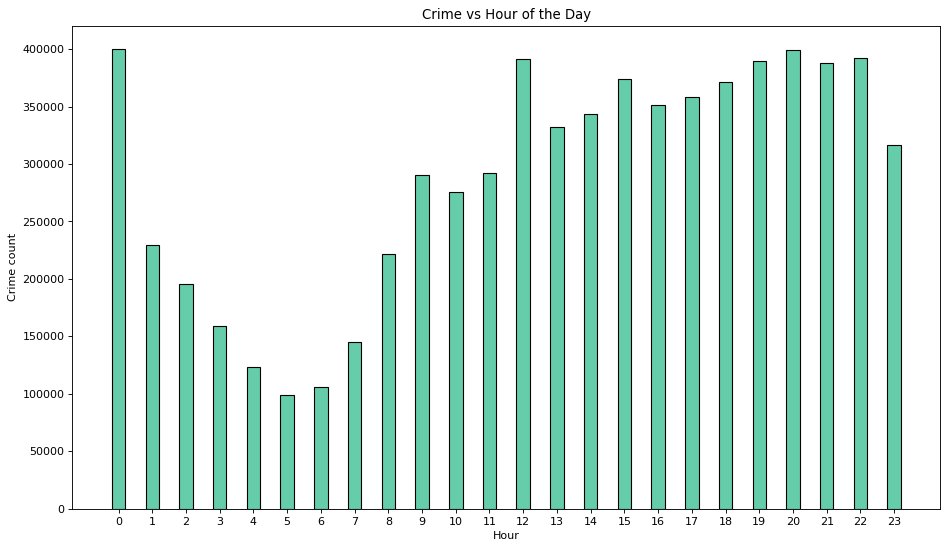

In [278]:
# Plot the crime vs hour of the day
plt.figure(figsize=(14, 8), dpi = 80)
hour_crime = chicago_crime['Hour'].value_counts().sort_index()
plt.bar(hour_crime.index, hour_crime.values, width=0.4, color='mediumaquamarine', edgecolor='black')
plt.xticks(hour_crime.index)
plt.title('Crime vs Hour of the Day')
plt.ylabel('Crime count')
plt.xlabel('Hour')
plt.show()

_It seems better to do your daily jogging at 5 am rather than at 7 pm. This plot isn't surprising, violence is high when it's dark, is lower at daybreak and increases during the day. Midday is also a peak hour for crimes which is also not surprising as people leave office at that time._

## 4. What's next ?